# Modelo AR(1): precios de índices

In [ ]:
# Importando Librerías

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt

from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2

import statsmodels.tsa.stattools as sts
import seaborn as sns

sns.set()

In [ ]:
# Carga de datos y preprocesado

raw_csv_data = pd.read_csv("../../DataSets/Index2018.csv")
dfComp = raw_csv_data.copy()

dfComp.date = pd.to_datetime(dfComp.date, dayfirst = True)

dfComp.set_index("date", inplace = True)

dfComp = dfComp.asfreq('b')

dfComp = dfComp.fillna(method ='ffill')

In [ ]:
# Creo una nueva columna con el no,bre de marketValue
dfComp['marketValue'] = dfComp.ftse

In [62]:
# Vamos a eliminar las columnas que no nos ayudan

del dfComp['spx']
del dfComp['dax']
del dfComp['ftse']
del dfComp['nikkei']


In [63]:
# Vamos a separar los datos en entrenamiento y prueba

# Definimos el tamaño de datos de entrenamiento
size = int(len(dfComp)*0.8)  # Es decir, tomando el 80% de los datos como entrenamiento.

# División de df

df, df_test = dfComp.iloc[:size], dfComp.iloc[size:]


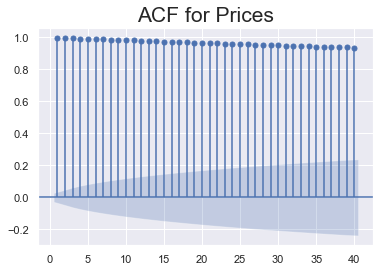

In [22]:
# Aplicamos la función de autocorrelación 

sgt.plot_acf(df.marketValue, zero = False, lags = 40)
plt.title('ACF for Prices', size = 21)
plt.show()

*Todos los coeficientes son significativos y positivos. Sin embargo, queremos un modelo más simple. El hecho de utilizar demasiados rezagos nos puede llevar a sobreajuste lo que nos generará errores a la hora de predecir valores futuros.*

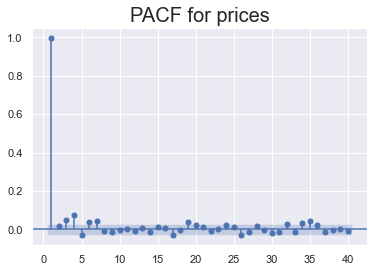

In [25]:
# Función de autocorrelación parcial. Nos interesa aquellos rezagos que tengan efectos directos.

sgt.plot_pacf(df.marketValue, lags = 40, alpha = 0.05, zero = False, method = 'ols')
plt.title('PACF for prices', size = 20)
plt.show()


In [27]:
# Modelo AR(1)
model_ar = ARMA(df.marketValue, order = (1,0)) # en order: 1 representa los rezagos que queremos incorporar y 0 
                                               # que no se está incliuyendo los valores residuales.
    
    
    


In [28]:
# Guardamos los resultados del modelo
result_ar = model_ar.fit()

In [29]:
# Un resumen del modelo

result_ar.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            marketValue   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.598
Method:                       css-mle   S.D. of innovations             59.258
Date:                Thu, 13 Jan 2022   AIC                          55251.196
Time:                        18:26:34   BIC                          55270.760
Sample:                    01-07-1994   HQIC                         55258.052
                         - 04-05-2013                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5055.8541    485.798     10.407      0.000    4103.707    6008.001
ar.L1.marketValue     0.9985      0.001   1298.620      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

In [30]:
# Complejizando modelos AR utilizando más lag

# Modelo de orden dos, es decir determinar los precios de hoy con los precios de dos momentos pasados en el tiempo


model_ar_2 = ARMA(df.marketValue, order = (2,0))

result_ar_2 = model_ar_2.fit()

result_ar_2.summary()







C:\Users\sept\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            marketValue   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.871
Method:                       css-mle   S.D. of innovations             59.249
Date:                Thu, 13 Jan 2022   AIC                          55251.742
Time:                        18:40:16   BIC                          55277.827
Sample:                    01-07-1994   HQIC                         55260.883
                         - 04-05-2013                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5089.6410    495.703     10.268      0.000    4118.081    6061.201
ar.L1.marketValue     0.9814      0.014     69.595      0.000       0.954       1.009
ar.L2.marketValue     0.0171      0.014      1.211      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4627           +0.0000j           58.4627            0.5000
-----------------------------------------------------------------------------
"""

*Nota que en este modelo el coeficiente resulta ser no significativo, es decir que los precios de dos rezagos atrás no afectan los precios de hoy. De otra manera, todos los efectos están capturados en los precios de ayer.* 

In [31]:

model_ar_3 = ARMA(df.marketValue, order = (3,0))

result_ar_3 = model_ar_3.fit()

result_ar_3.summary()


C:\Users\sept\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            marketValue   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27615.871
Method:                       css-mle   S.D. of innovations             59.178
Date:                Thu, 13 Jan 2022   AIC                          55241.742
Time:                        18:46:14   BIC                          55274.349
Sample:                    01-07-1994   HQIC                         55253.168
                         - 04-05-2013                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5089.6413    520.367      9.781      0.000    4069.740    6109.543
ar.L1.marketValue     0.9806      0.014     69.619      0.000       0.953       1.008
ar.L2.marketValue    -0.0309      0.020     -1.563      0.118      -0.070       0.008
ar.L3.marketValue     0.0489      0.014      3.466      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           -0.0000j            1.0013           -0.0000
AR.2           -0.1850           -4.5161j            4.5199           -0.2565
AR.3           -0.1850           +4.5161j            4.5199            0.2565
-----------------------------------------------------------------------------
"""

In [32]:

model_ar_4 = ARMA(df.marketValue, order = (4,0))

result_ar_4 = model_ar_4.fit()

result_ar_4.summary()


C:\Users\sept\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            marketValue   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Thu, 13 Jan 2022   AIC                          55217.130
Time:                        18:47:01   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5089.6412    559.881      9.091      0.000    3992.295    6186.988
ar.L1.marketValue     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.marketValue    -0.0286      0.020     -1.455      0.146      -0.067       0.010
ar.L3.marketValue    -0.0224      0.020     -1.135      0.256      -0.061       0.016
ar.L4.marketValue     0.0728      0.014      5.166      0.000       0.045       0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           -0.0000j            1.0011           -0.0000
AR.2            0.9550           -2.0884j            2.2964           -0.1817
AR.3            0.9550           +2.0884j            2.2964            0.1817
AR.4           -2.6036           -0.0000j            2.6036           -0.5000
-----------------------------------------------------------------------------
"""

In [35]:
# Veremos si los modelos son diferentes, creamos una función
# La hipótesis nula es que los dos modelos son significativamente iguales.


def LLR_test(mod_1,mod_2, DF = 1):
    L1 = mod_1.llf                         #llf se usa para hallar la logverosimilitud
    L2 = mod_2.llf
    LR = (2*(L2-L1))                       #Estadístico que se distribuye chi2
    p = chi2.sf(LR,DF).round(3)
    return p

In [36]:
# Comparando modelos

LLR_test(result_ar_2,result_ar_3)

0.001

fíjate que el valor obtenido es menor a un a prob de 0.05, entonces podemos decir que los dos modelos son significativamnete diferentes. Por tanto, en este caso añadir complejidad es mejor, por tanto nos iríamos con el tres.


In [37]:
LLR_test(result_ar_3,result_ar_4)

0.0

In [38]:

model_ar_5 = ARMA(df.marketValue, order = (5,0))

result_ar_5 = model_ar_5.fit()

print(result_ar_5.summary())
print("\nLLR tes p-value = " + str(LLR_test(result_ar_4,result_ar_5)))


C:\Users\sept\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:            marketValue   No. Observations:                 5021
Model:                     ARMA(5, 0)   Log Likelihood              -27600.348
Method:                       css-mle   S.D. of innovations             58.996
Date:                Thu, 13 Jan 2022   AIC                          55214.697
Time:                        19:10:39   BIC                          55260.346
Sample:                    01-07-1994   HQIC                         55230.693
                         - 04-05-2013                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5089.6413    543.546      9.364      0.000    4024.311    6154.971
ar.L1.marketValue     0.9791      0.014     69.481      0.000       0.952       1.007
ar.L2.marketValue    -0.

In [39]:

model_ar_6 = ARMA(df.marketValue, order = (6,0))

result_ar_6 = model_ar_6.fit()

print(result_ar_6.summary())
print("\nLLR tes p-value = " + str(LLR_test(result_ar_5,result_ar_6)))


C:\Users\sept\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:            marketValue   No. Observations:                 5021
Model:                     ARMA(6, 0)   Log Likelihood              -27596.474
Method:                       css-mle   S.D. of innovations             58.950
Date:                Thu, 13 Jan 2022   AIC                          55208.947
Time:                        19:12:11   BIC                          55261.118
Sample:                    01-07-1994   HQIC                         55227.229
                         - 04-05-2013                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5089.6412    565.241      9.004      0.000    3981.789    6197.493
ar.L1.marketValue     0.9803      0.014     69.604      0.000       0.953       1.008
ar.L2.marketValue    -0.

In [40]:
model_ar_7 = ARMA(df.marketValue, order = (7,0))

result_ar_7 = model_ar_7.fit()

print(result_ar_7.summary())
print("\nLLR tes p-value = " + str(LLR_test(result_ar_6,result_ar_7)))

C:\Users\sept\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:            marketValue   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -27592.111
Method:                       css-mle   S.D. of innovations             58.898
Date:                Thu, 13 Jan 2022   AIC                          55202.221
Time:                        19:13:09   BIC                          55260.914
Sample:                    01-07-1994   HQIC                         55222.788
                         - 04-05-2013                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5430.3575    859.555      6.318      0.000    3745.661    7115.054
ar.L1.marketValue     0.9787      0.014     69.592      0.000       0.951       1.006
ar.L2.marketValue    -0.

In [41]:
model_ar_8 = ARMA(df.marketValue, order = (8,0))

result_ar_8 = model_ar_8.fit()

print(result_ar_8.summary())
print("\nLLR tes p-value = " + str(LLR_test(result_ar_7,result_ar_8)))

C:\Users\sept\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:            marketValue   No. Observations:                 5021
Model:                     ARMA(8, 0)   Log Likelihood              -27591.739
Method:                       css-mle   S.D. of innovations             58.894
Date:                Thu, 13 Jan 2022   AIC                          55203.478
Time:                        19:14:02   BIC                          55268.692
Sample:                    01-07-1994   HQIC                         55226.329
                         - 04-05-2013                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5089.6416    585.002      8.700      0.000    3943.059    6236.224
ar.L1.marketValue     0.9790      0.014     69.476      0.000       0.951       1.007
ar.L2.marketValue    -0.

**NOTE que el coeficiente del octavo rezago no es significativo y que tampoco hay diferencias entre el modelo 7 y 8, por lo que nos quedaríamos con el modelo 7. Esto me indica que incluir los precios de una semana atrás puede mejorar la estimación a pesar de que tenga coef no significativos** 

In [45]:
# Ahora, podemo comparar el modelo de un retraso y el que tiene siete retrasos.

print("LLR test:"+str(LLR_test(result_ar,result_ar_7, DF = 6)))


LLR test:0.0


En este caso, nos quedamos con el modelo 7. Añadir más complejidad al modelo es significativamente mejor.

Fíjate que el modelo 7 tiene coeficientes que son significativamente cero. Esto  puede ser un  problema. Ocurre que los modelos AR se desempeñan mejor con series temporales estacionarias. 

Ya vimos con el test de D-F que la serie no provenía de un proceso estacionaria, por lo que no deberíamos confiar en este tipo de modelos para llevar a cabo este análisis. Sin embargo, se pueden hacer transformaciones para corregir estacionariedad (tema de finanzas con los retornos).

In [46]:
# Análisis de los residuos

df['res_price'] = result_ar_7.resid



<ipython-input-46-51862523457f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_price'] = result_ar_7.resid


In [47]:
# Los residuos deberían comportarse como ruido blanco.

sts.adfuller(df.res_price)


(-78.37173232996403,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 54842.62195162322)

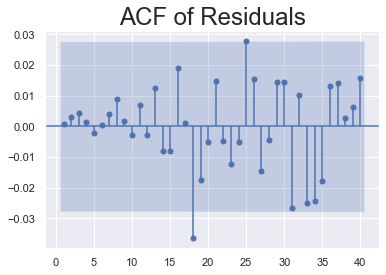

In [48]:
# Para el ruido blanco no debe existir autocorrelación

sgt.plot_acf(df.res_price, zero = False, lags = 40)
plt.title("ACF of Residuals", size = 24)
plt.show()


# No hay autocorrelación. Pero puede existir un mejor predictor

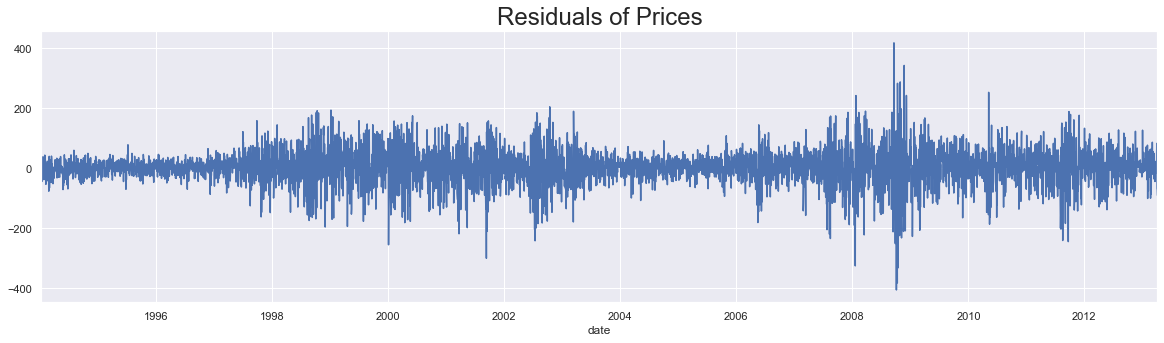

In [49]:
df.res_price[1:].plot(figsize = (20,5))
plt.title("Residuals of Prices", size = 24)
plt.show()

# AR - Retornos

In [65]:
# Aplicando el test de DICKEY-FULLER sobre la serie de precios 'ftse'

sts.adfuller(df.marketValue)

(-1.9041551418836868,
 0.33010893277028314,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

Por la prueba, no se rechaza la H0, POR TANTO, esta cosa no es estacionaria. Específicamente en finanzas, podemos hacer transformaciones sobre los precios (Cambios). 

In [66]:
# retornos: porcentaje de cambios entre dos periodos consecutivos

df['returns'] = df.marketValue.pct_change(1).mul(100)
df=df.iloc[1:]
df.head()

<ipython-input-66-5f9a61094a05>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df.marketValue.pct_change(1).mul(100)


,marketValue,returns
date,,
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166
1994-01-14,3400.56,1.206842


In [68]:
# Test D-F en la variable retornos

sts.adfuller(df.returns)

(-12.770265719497305,
 7.798058336035866e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.7672456975)

Fíjate que ahora la serie si es estacionaria.

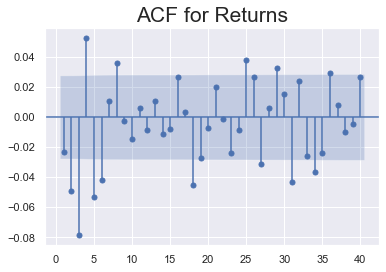

In [94]:
# ACF de la serie de los retornos

sgt.plot_acf(df.returns, zero = False, lags = 40)
plt.title('ACF for Returns', size = 21)
plt.show()




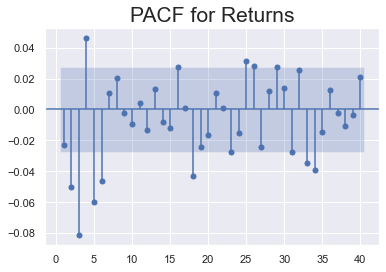

In [95]:

# PACF de la serie de los retornos

sgt.plot_pacf(df.returns, lags = 40, alpha = 0.05, zero = False, method = 'ols')
plt.title('PACF for Returns', size = 21)
plt.show()

In [96]:
# Modelo AR(1)
model_ar_returns = ARMA(df.returns, order = (1,0))
result_ar_returns = model_ar_returns.fit()
print(result_ar_returns.summary())


C:\Users\sept\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Thu, 13 Jan 2022   AIC                          15865.497
Time:                        20:33:02   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Root

<AxesSubplot:xlabel='date'>

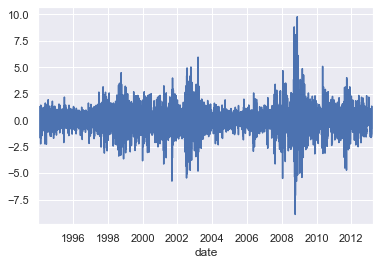

In [98]:
df['res_return_1'] = result_ar_returns.resid
df.res_return_1.plot()

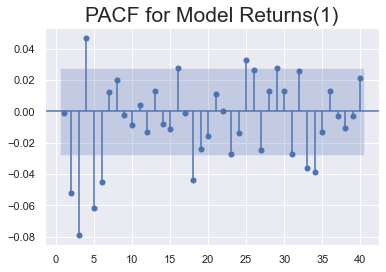

In [101]:
sgt.plot_pacf(df.res_return_1, lags = 40, alpha = 0.05, zero = False, method = 'ols')
plt.title('PACF for Model Returns(1)', size = 21)
plt.show()

In [99]:
sts.adfuller(df.res_return_1)

(-12.782789960394554,
 7.354232399824045e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.449407710068)

In [76]:
# Model AR(2)

# Modelo AR(2)
model_ar_returns_2 = ARMA(df.returns, order = (2,0))
result_ar_returns_2 = model_ar_returns_2.fit()
result_ar_returns_2.summary()

C:\Users\sept\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -7923.456
Method:                       css-mle   S.D. of innovations              1.173
Date:                Thu, 13 Jan 2022   AIC                          15854.911
Time:                        20:08:56   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.220      0.222      -0.011       0.049
ar.L1.returns    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.returns    -0.0500      0.014     -3.550      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4635j            4.4701           -0.2586
AR.2           -0.2417           +4.4635j            4.4701            0.2586
-----------------------------------------------------------------------------
"""

In [83]:
# Comparando modelos

LLR_test(result_ar_returns,result_ar_returns_2)

0.0

In [77]:
# Modelo AR(3)
model_ar_returns_3 = ARMA(df.returns, order = (3,0))
result_ar_returns_3 = model_ar_returns_3.fit()
result_ar_returns_3.summary()

C:\Users\sept\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -7906.738
Method:                       css-mle   S.D. of innovations              1.169
Date:                Thu, 13 Jan 2022   AIC                          15823.477
Time:                        20:12:23   BIC                          15856.083
Sample:                    01-10-1994   HQIC                         15834.902
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.330      0.184      -0.009       0.047
ar.L1.returns    -0.0283      0.014     -2.011      0.044      -0.056      -0.001
ar.L2.returns    -0.0521      0.014     -3.705      0.000      -0.080      -0.025
ar.L3.returns    -0.0815      0.014     -5.792      0.000      -0.109      -0.054
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9233           -2.0210j            2.2219           -0.1818
AR.2            0.9233           +2.0210j            2.2219            0.1818
AR.3           -2.4855           -0.0000j            2.4855           -0.5000
-----------------------------------------------------------------------------
"""

In [84]:
# Comparando modelos

LLR_test(result_ar_returns_2,result_ar_returns_3)

0.0

In [78]:
# Modelo AR(4)
model_ar_returns_4 = ARMA(df.returns, order = (4,0))
result_ar_returns_4 = model_ar_returns_4.fit()
result_ar_returns_4.summary()

C:\Users\sept\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(4, 0)   Log Likelihood               -7901.330
Method:                       css-mle   S.D. of innovations              1.168
Date:                Thu, 13 Jan 2022   AIC                          15814.661
Time:                        20:13:19   BIC                          15853.788
Sample:                    01-10-1994   HQIC                         15828.371
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.267      0.205      -0.010       0.048
ar.L1.returns    -0.0245      0.014     -1.739      0.082      -0.052       0.003
ar.L2.returns    -0.0496      0.014     -3.531      0.000      -0.077      -0.022
ar.L3.returns    -0.0802      0.014     -5.701      0.000      -0.108      -0.053
ar.L4.returns     0.0464      0.014      3.291      0.001       0.019       0.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8888           -0.0000j            1.8888           -0.5000
AR.2            0.3231           -1.9331j            1.9599           -0.2236
AR.3            0.3231           +1.9331j            1.9599            0.2236
AR.4            2.9701           -0.0000j            2.9701           -0.0000
-----------------------------------------------------------------------------
"""

In [85]:
LLR_test(result_ar_returns_3,result_ar_returns_4)

0.001

In [79]:
# Modelo AR(5)
model_ar_returns_5 = ARMA(df.returns, order = (5,0))
result_ar_returns_5 = model_ar_returns_5.fit()
result_ar_returns_5.summary()

C:\Users\sept\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 0)   Log Likelihood               -7892.390
Method:                       css-mle   S.D. of innovations              1.166
Date:                Thu, 13 Jan 2022   AIC                          15798.779
Time:                        20:14:12   BIC                          15844.428
Sample:                    01-10-1994   HQIC                         15814.775
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.348      0.178      -0.009       0.046
ar.L1.returns    -0.0217      0.014     -1.544      0.123      -0.049       0.006
ar.L2.returns    -0.0544      0.014     -3.865      0.000      -0.082      -0.027
ar.L3.returns    -0.0831      0.014     -5.914      0.000      -0.111      -0.056
ar.L4.returns     0.0449      0.014      3.190      0.001       0.017       0.073
ar.L5.returns    -0.0596      0.014     -4.232      0.000      -0.087      -0.032
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5481           -0.0000j            1.5481           -0.5000
AR.2           -0.2860           -1.7252j            1.7487           -0.2761
AR.3           -0.2860           +1.7252j            1.7487            0.2761
AR.4            1.4366           -1.2157j            1.8819           -0.1118
AR.5            1.4366           +1.2157j            1.8819            0.1118
-----------------------------------------------------------------------------
"""

In [86]:
LLR_test(result_ar_returns_4,result_ar_returns_5)

0.0

In [80]:
# Modelo AR(6)
model_ar_returns_6 = ARMA(df.returns, order = (6,0))
result_ar_returns_6 = model_ar_returns_6.fit()
result_ar_returns_6.summary()

C:\Users\sept\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood               -7886.945
Method:                       css-mle   S.D. of innovations              1.164
Date:                Thu, 13 Jan 2022   AIC                          15789.890
Time:                        20:15:08   BIC                          15842.059
Sample:                    01-10-1994   HQIC                         15808.170
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.414      0.157      -0.007       0.045
ar.L1.returns    -0.0245      0.014     -1.740      0.082      -0.052       0.003
ar.L2.returns    -0.0523      0.014     -3.716      0.000      -0.080      -0.025
ar.L3.returns    -0.0870      0.014     -6.174      0.000      -0.115      -0.059
ar.L4.returns     0.0424      0.014      3.009      0.003       0.015       0.070
ar.L5.returns    -0.0607      0.014     -4.309      0.000      -0.088      -0.033
ar.L6.returns    -0.0466      0.014     -3.302      0.001      -0.074      -0.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2869           -0.9022j            1.5716           -0.0973
AR.2            1.2869           +0.9022j            1.5716            0.0973
AR.3           -0.0727           -1.5282j            1.5299           -0.2576
AR.4           -0.0727           +1.5282j            1.5299            0.2576
AR.5           -1.8659           -0.4836j            1.9275           -0.4596
AR.6           -1.8659           +0.4836j            1.9275            0.4596
-----------------------------------------------------------------------------
"""

In [87]:
LLR_test(result_ar_returns_5,result_ar_returns_6)

0.001

In [81]:
# Modelo AR(7)
model_ar_returns_7 = ARMA(df.returns, order = (7,0))
result_ar_returns_7 = model_ar_returns_7.fit()
result_ar_returns_7.summary()

C:\Users\sept\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood               -7886.647
Method:                       css-mle   S.D. of innovations              1.164
Date:                Thu, 13 Jan 2022   AIC                          15791.294
Time:                        20:15:52   BIC                          15849.985
Sample:                    01-10-1994   HQIC                         15811.860
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.399      0.162      -0.008       0.045
ar.L1.returns    -0.0240      0.014     -1.702      0.089      -0.052       0.004
ar.L2.returns    -0.0517      0.014     -3.663      0.000      -0.079      -0.024
ar.L3.returns    -0.0874      0.014     -6.202      0.000      -0.115      -0.060
ar.L4.returns     0.0433      0.014      3.064      0.002       0.016       0.071
ar.L5.returns    -0.0601      0.014     -4.263      0.000      -0.088      -0.032
ar.L6.returns    -0.0463      0.014     -3.282      0.001      -0.074      -0.019
ar.L7.returns     0.0109      0.014      0.772      0.440      -0.017       0.039
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6490           -0.5384j            1.7347           -0.4498
AR.2           -1.6490           +0.5384j            1.7347            0.4498
AR.3           -0.1189           -1.4954j            1.5001           -0.2626
AR.4           -0.1189           +1.4954j            1.5001            0.2626
AR.5            1.2790           -0.9786j            1.6105           -0.1039
AR.6            1.2790           +0.9786j            1.6105            0.1039
AR.7            5.2270           -0.0000j            5.2270           -0.0000
-----------------------------------------------------------------------------
"""

In [88]:
LLR_test(result_ar_returns_6,result_ar_returns_7)

0.44

In [82]:
# Modelo AR(8)
model_ar_returns_8 = ARMA(df.returns, order = (8,0))
result_ar_returns_8 = model_ar_returns_8.fit()
result_ar_returns_8.summary()

C:\Users\sept\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(8, 0)   Log Likelihood               -7885.599
Method:                       css-mle   S.D. of innovations              1.164
Date:                Thu, 13 Jan 2022   AIC                          15791.199
Time:                        20:16:36   BIC                          15856.410
Sample:                    01-10-1994   HQIC                         15814.050
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.370      0.171      -0.008       0.046
ar.L1.returns    -0.0242      0.014     -1.718      0.086      -0.052       0.003
ar.L2.returns    -0.0507      0.014     -3.593      0.000      -0.078      -0.023
ar.L3.returns    -0.0862      0.014     -6.105      0.000      -0.114      -0.059
ar.L4.returns     0.0424      0.014      2.999      0.003       0.015       0.070
ar.L5.returns    -0.0583      0.014     -4.122      0.000      -0.086      -0.031
ar.L6.returns    -0.0452      0.014     -3.203      0.001      -0.073      -0.018
ar.L7.returns     0.0114      0.014      0.807      0.420      -0.016       0.039
ar.L8.returns     0.0204      0.014      1.448      0.148      -0.007       0.048
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1098           -1.0020j            1.4952           -0.1169
AR.2            1.1098           +1.0020j            1.4952            0.1169
AR.3            1.9402           -0.0000j            1.9402           -0.0000
AR.4           -0.0601           -1.4119j            1.4131           -0.2568
AR.5           -0.0601           +1.4119j            1.4131            0.2568
AR.6           -1.4935           -1.1306j            1.8731           -0.3969
AR.7           -1.4935           +1.1306j            1.8731            0.3969
AR.8           -1.6104           -0.0000j            1.6104           -0.5000
-----------------------------------------------------------------------------
"""

Al parecer el Modelo 6 tiene mejor ajuste.

In [89]:
# Análisis de los residuos del modelo 6


# Análisis de los residuos

df['res_return'] = result_ar_returns_6.resid

In [90]:
# Los residuos deberían comportarse como ruido blanco.

sts.adfuller(df.res_return)


(-70.78379965465469,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15692.570834150687)

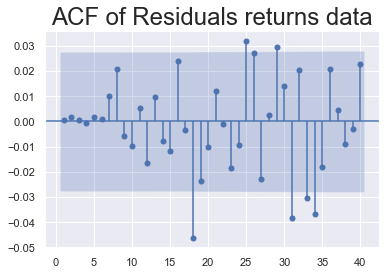

In [91]:
# Para el ruido blanco no debe existir autocorrelación

sgt.plot_acf(df.res_return, zero = False, lags = 40)
plt.title("ACF of Residuals returns data", size = 24)
plt.show()

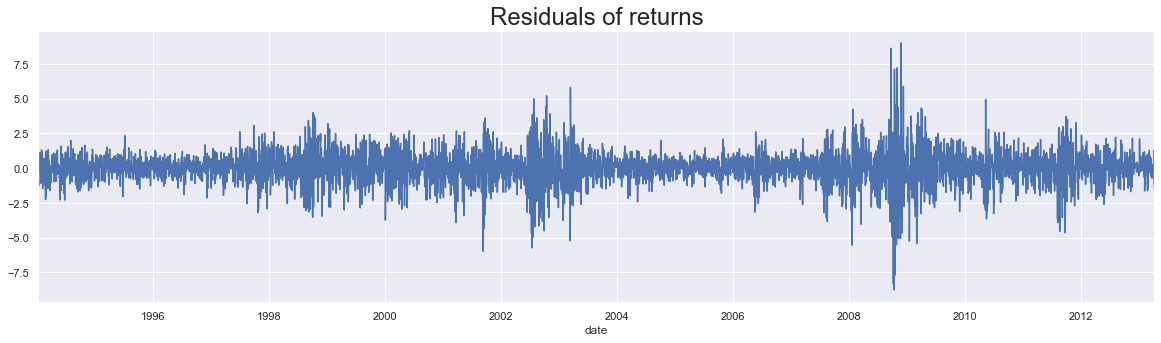

In [93]:
df.res_return[1:].plot(figsize = (20,5))
plt.title("Residuals of returns", size = 24)
plt.show()